### Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,<br>

Sepal Length <br>
Sepal Width <br>
Petal Length <br>
Petal Width <br>
Using above 4 features you will clasify a flower in one of the three categories, <br>

Setosa<br>
Versicolour<br>
Virginica<br>

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from seaborn import heatmap
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import joblib 

#### Exploaring and modeyfing the data

In [2]:
df = load_iris()

In [3]:
dir(df)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris_data = pd.DataFrame(df.data, columns=df.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_data['Species'] = df.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris_data['flower_name'] = iris_data.Species.apply(lambda x: df.target_names[x])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [15]:
setosa = iris_data[iris_data.Species == 0]
versicolor = iris_data[iris_data.Species == 1]
virginica = iris_data[iris_data.Species == 2]

In [20]:
setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
versicolor.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [22]:
virginica.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


#### Visualizing

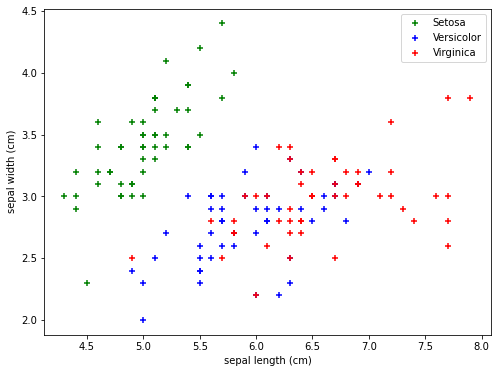

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker='+', c='g', label='Setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], marker='+', c='b', label='Versicolor')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], marker='+', c='r', label='Virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

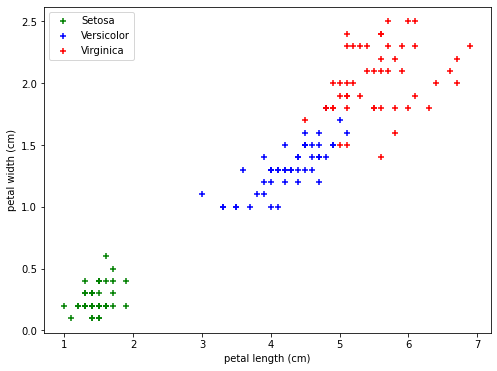

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], marker='+', c='g', label='Setosa')
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], marker='+', c='b', label='Versicolor')
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], marker='+', c='r', label='Virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

#### Assigning Features and target Variables

In [38]:
X = iris_data.drop(['Species', 'flower_name'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
y = iris_data.Species

#### Spliting the data into training and testing data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

#### Bulding and Training Model

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\eyada\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Accuracy of the model

In [42]:
model.score(X_test, y_test)

0.9736842105263158

#### confusion matrix

In [49]:
y_predicted = model.predict(X_test)

In [51]:
cmf = confusion_matrix(y_test, y_predicted)
cmf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

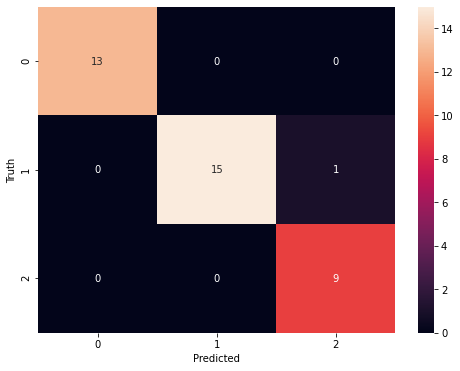

In [61]:
plt.figure(figsize=(8,6))
heatmap(cmf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### Save the model

In [62]:
joblib.dump(model, 'Iris flower prediction')

['Iris flower prediction']

#### Load the model

In [63]:
mj = joblib.load('Iris flower prediction')

#### Using the model after loading

In [64]:
mj.predict([[5.5, 3.7, 1.6, 0.5]])

array([0])

In [65]:
mj.predict([[6.1, 2.8, 3.5, 1.4]])

array([1])